In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and embarked have null values. i Will try to fix them

How many survive

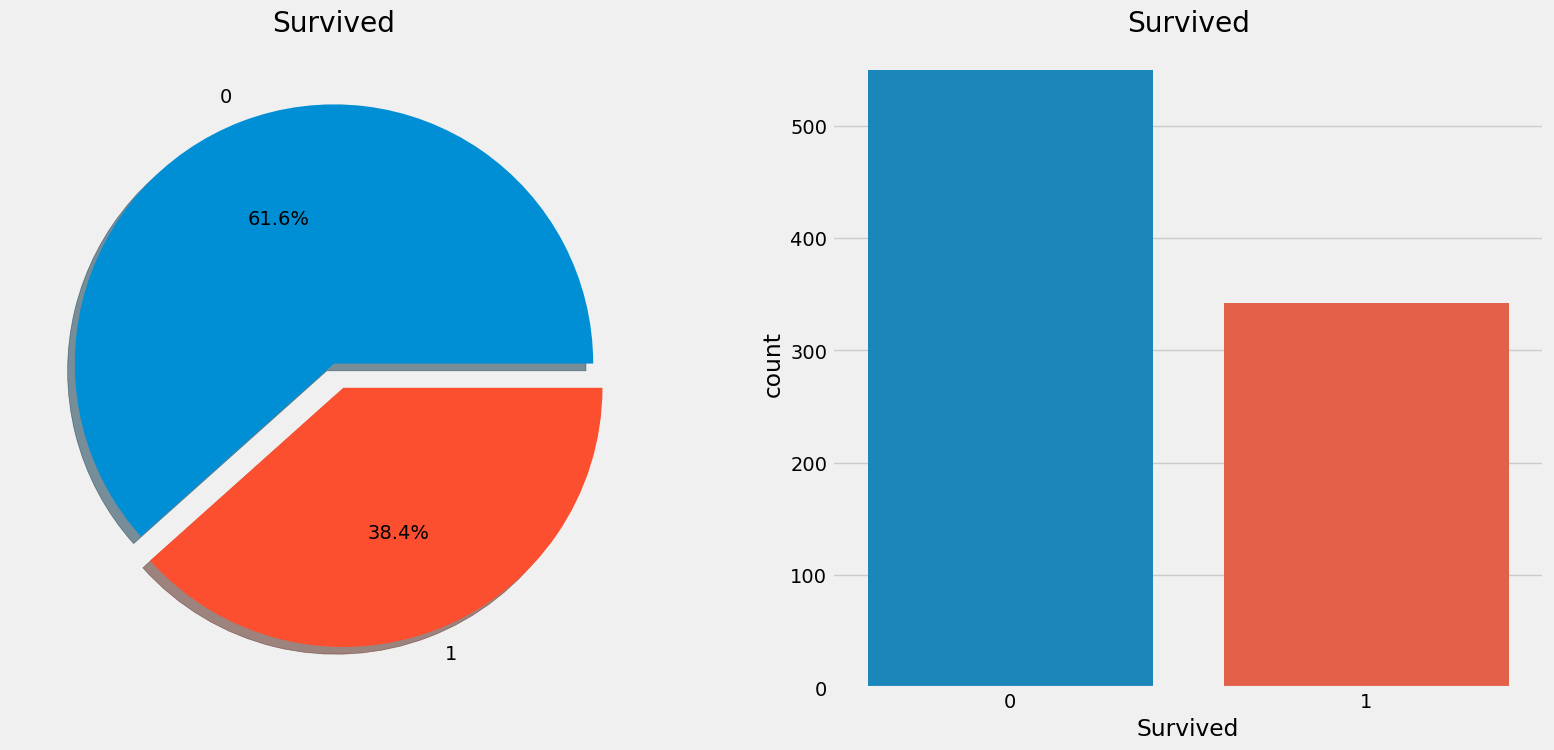

In [7]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Analysis on Sex

In [9]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

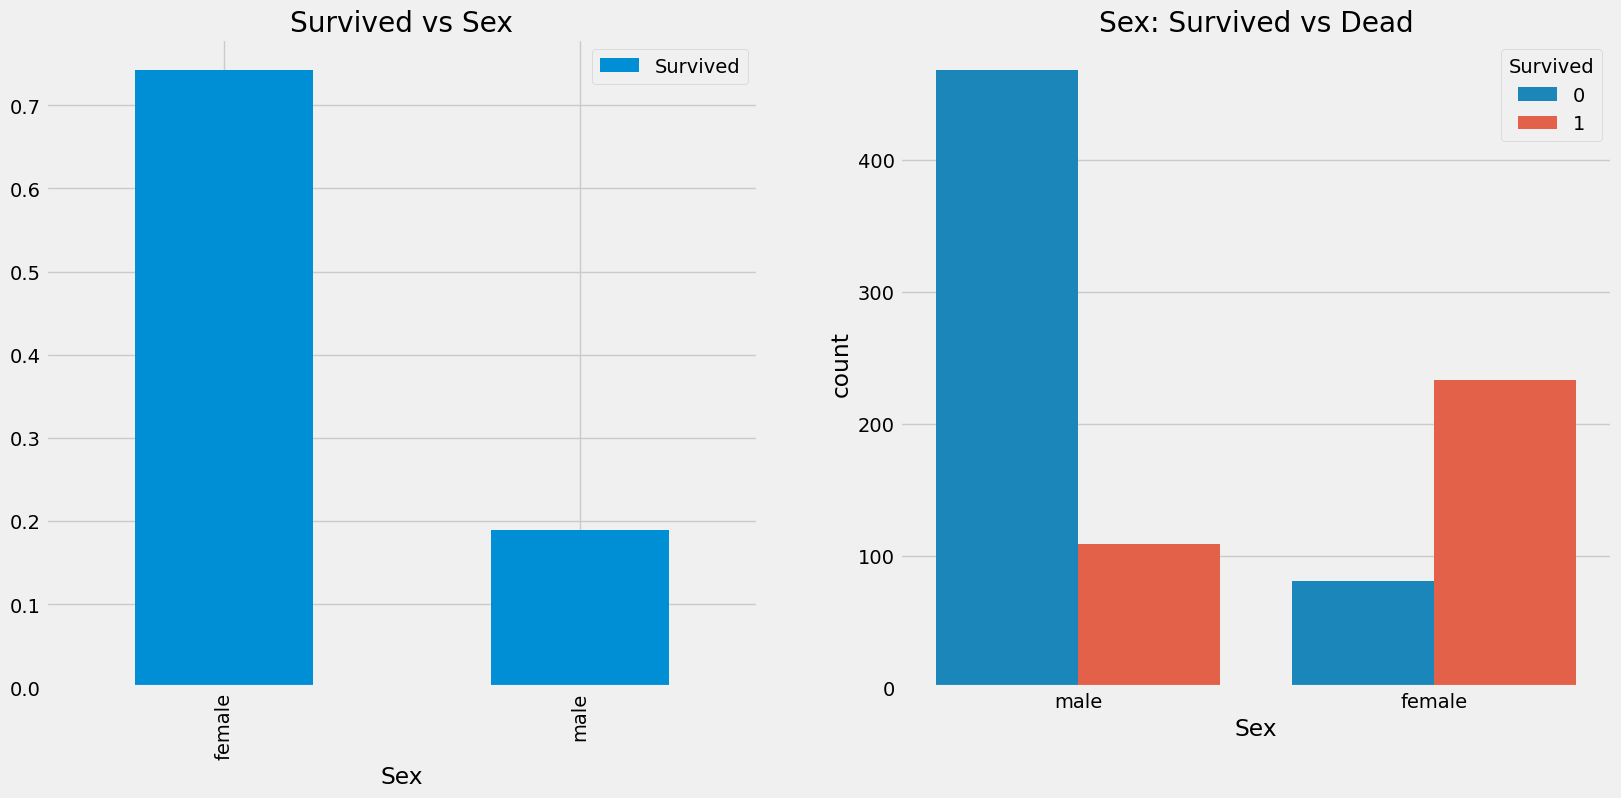

In [10]:
f, ax = plt.subplots(1,2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
data['Survived'] = data['Survived'].astype(str) #  hue에 사용된 Survived이라는 column이 str타입이 아니라 생긴 오류
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

Pclass - ordinal feature

In [12]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


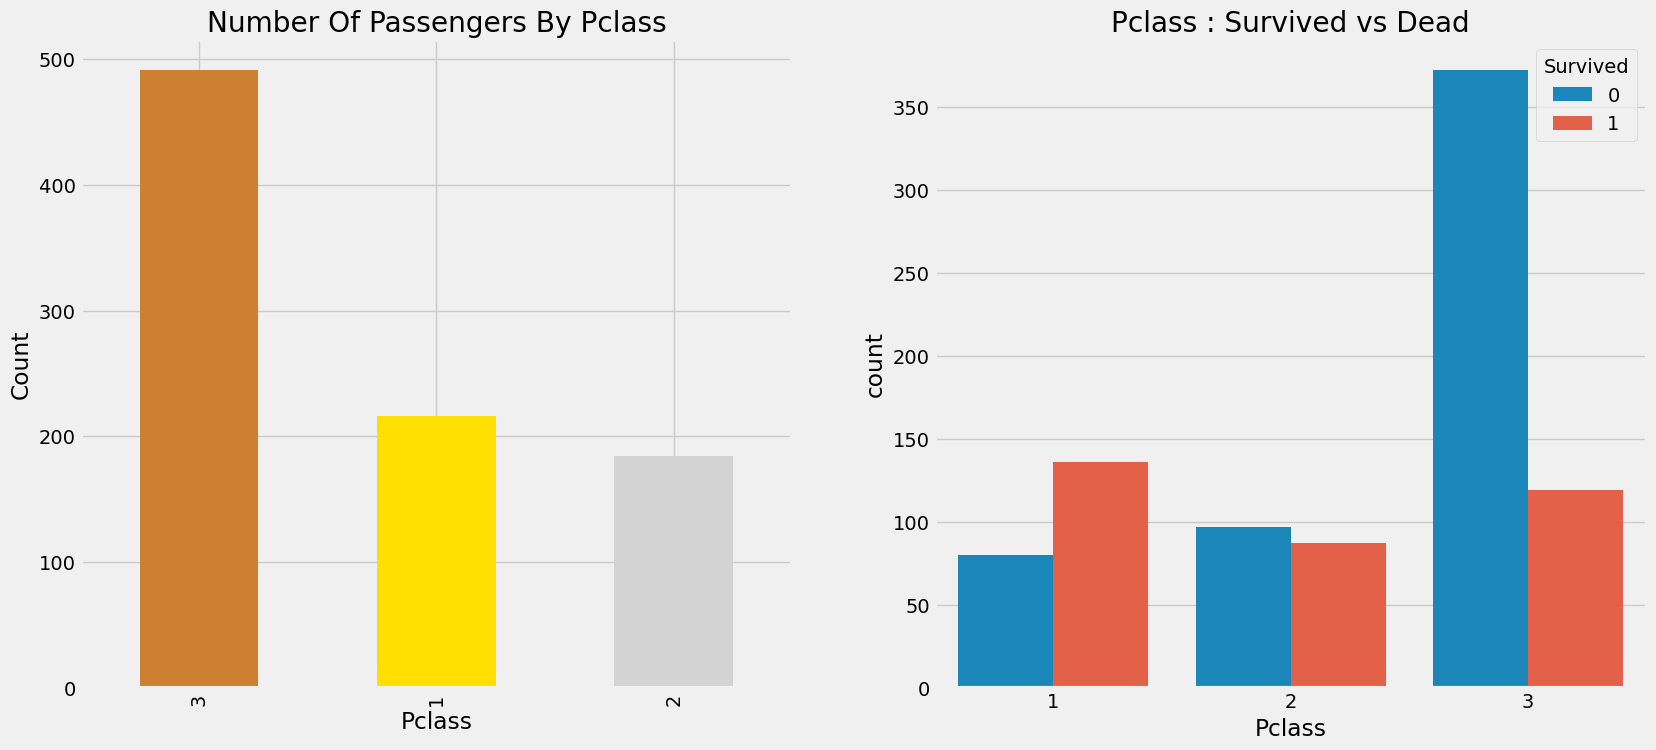

In [13]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead')
plt.show()

In [14]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

In [15]:
data['Sex'] = data['Sex'].astype(str)

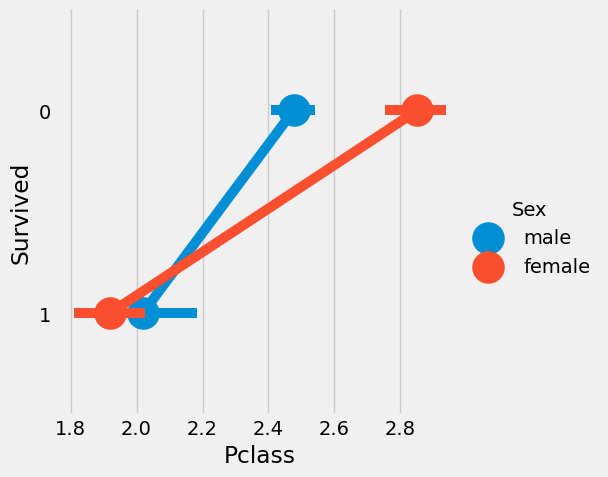

In [16]:
#factorplot은 carplot으로 대체되었음
#sns.factorplot('Pclass', y=Survived', hue='Sex', data=data)
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

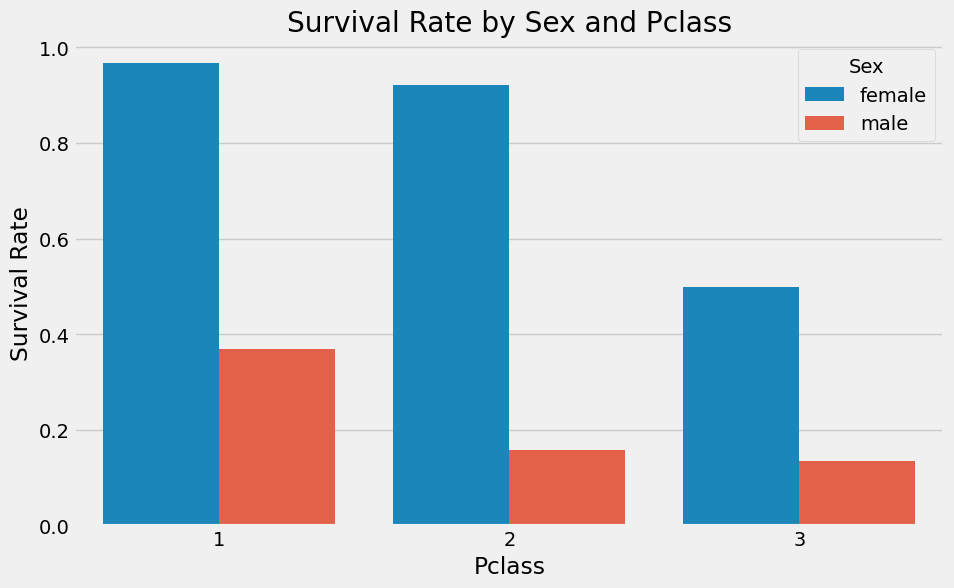

In [36]:
data['Survived'] = data['Survived'].astype(int)  # Survived를 정수형으로 변환

# 성별 및 Pclass별 생존자 비율 계산
grouped_data = data.groupby(['Sex', 'Pclass']).agg({'Survived': 'mean'}).reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=grouped_data)
plt.title('Survival Rate by Sex and Pclass')
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
plt.show()